<a href="https://colab.research.google.com/github/imams12/ML-chronic-kidney-disease-prediction/blob/main/ML_chronic_kidney_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
### Task to predict whether person has ckd or notckd??

## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

# Prepare data for Analysis &  Modelling

## Connect Gdrive kedalam Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import Data

In [3]:
path = "gdrive/MyDrive/DATA/Kidney Disease/"

In [4]:
os.listdir(path)

['kidney_disease.csv', 'data_description.txt']

In [5]:
# Membaca file csv
df = pd.read_csv(path + 'kidney_disease.csv')

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


## Change Kolom Deskripsi

In [7]:
columns = pd.read_csv(path + 'data_description.txt',sep="-")
columns = columns.reset_index()

In [8]:
columns.columns = ['cols', 'abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [9]:
# Mengganti Deskripsi Kolom
df.columns = columns['abb_col_names'].values

In [10]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


## Convert Tipe Data

In [11]:
# Cek type data
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [12]:
def convert_dtypes(df,feature):
  df[feature]=pd.to_numeric(df[feature],errors='coerce')

In [13]:
features=['packed cell volume','white blood cell count','red blood cell count']

for feature in features:
  convert_dtypes(df,feature)

In [14]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [15]:
# Drop id kolom
df.drop('id', axis=1, inplace=True)

# Apply Data Cleaning Techniques on data & Clean data

In [16]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Membedakan tipe data

In [17]:
def extract_cat_num(df):  
  cat_col = [col for col in df.columns if df[col].dtypes=='object']
  num_col = [col for col in df.columns if df[col].dtypes!='object']
  return cat_col,num_col

In [18]:
cat_col,num_col = extract_cat_num(df)

In [19]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [20]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

## Clean unique values in categorical column

In [21]:
# Check Unique values in categorical colom
for col in cat_col:
  print('{} has {} values '.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [22]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no',' yes':'yes','\tyes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace='\tno', value='no')
df['class'] = df['class'].replace(to_replace='ckd\t', value='ckd')

In [23]:
for col in cat_col:
  print('{} has {} values '.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' nan] values 


coronary artery disease has ['no' 'yes' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'notckd'] values 




# Analysing Distributions data

## Analysing distribution of each and every numerical column

In [24]:
len(num_col)

14

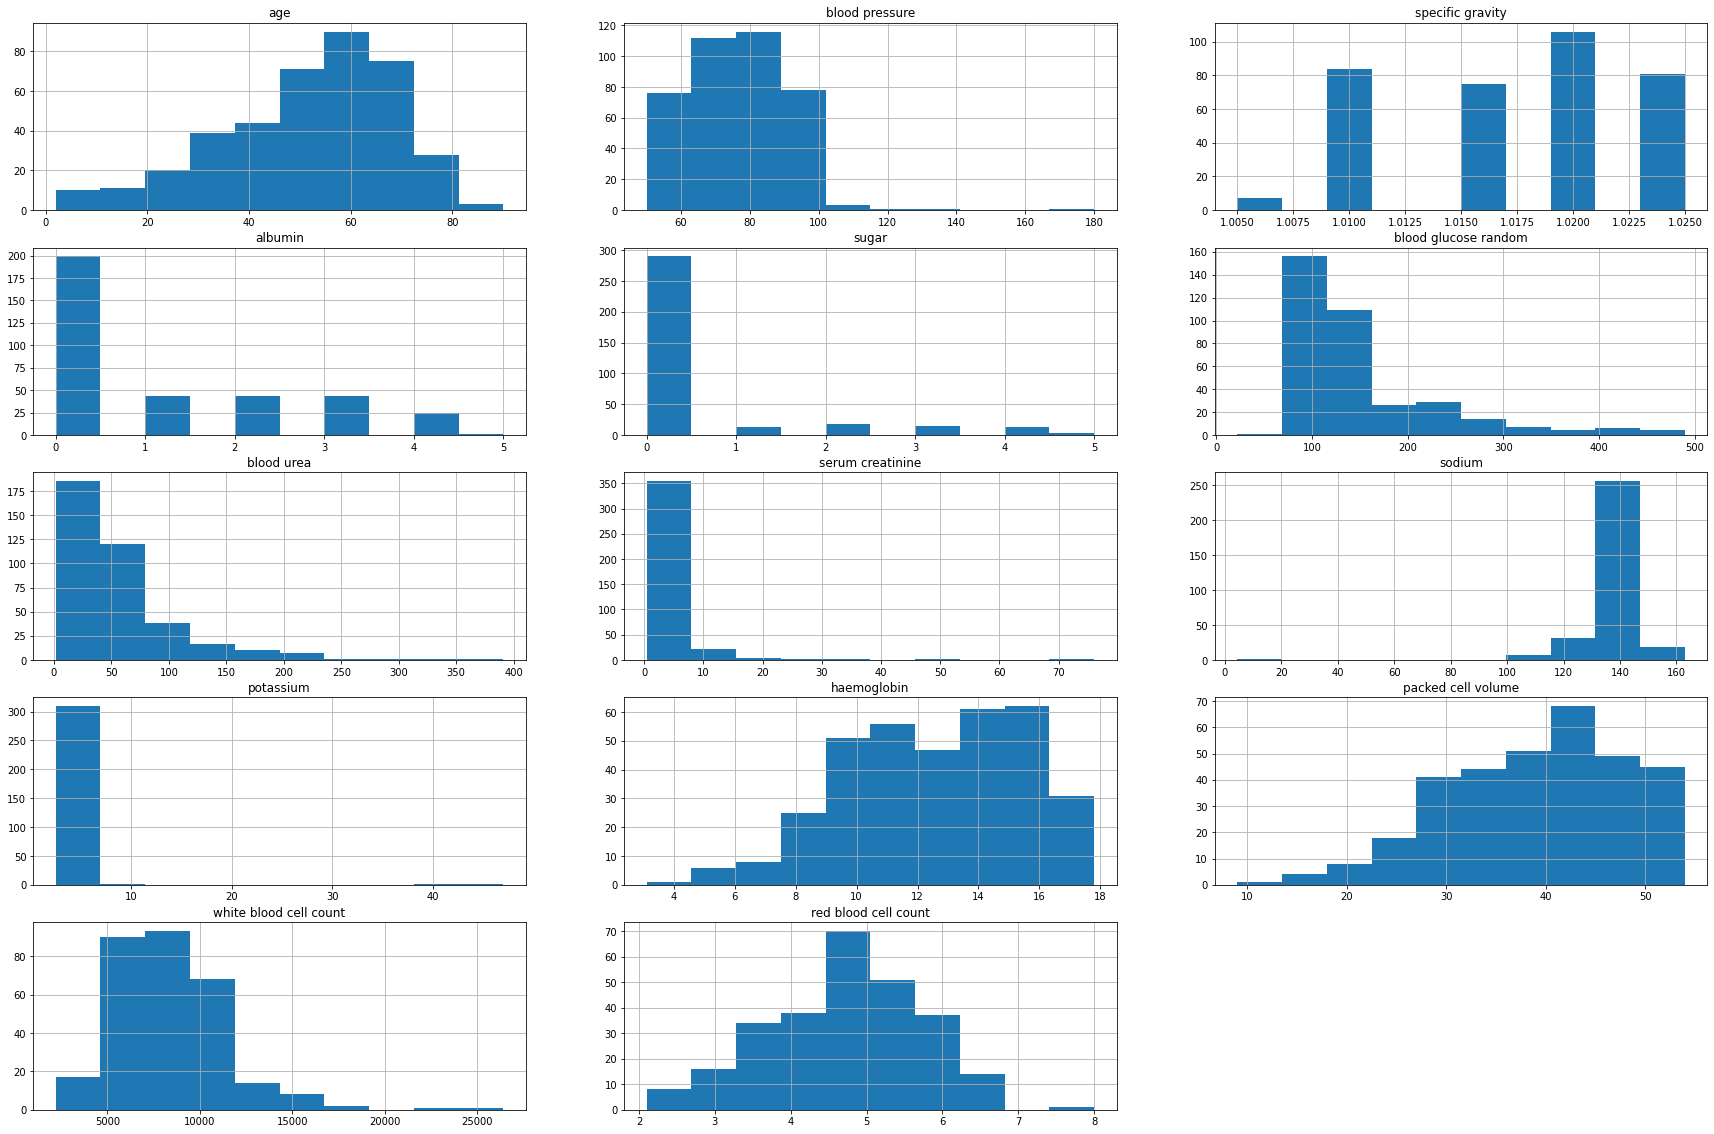

In [25]:
plt.figure(figsize=(30,20))

for i, feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

## Check Label distribution of Categorical data

In [26]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [27]:
len(cat_col)

11

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

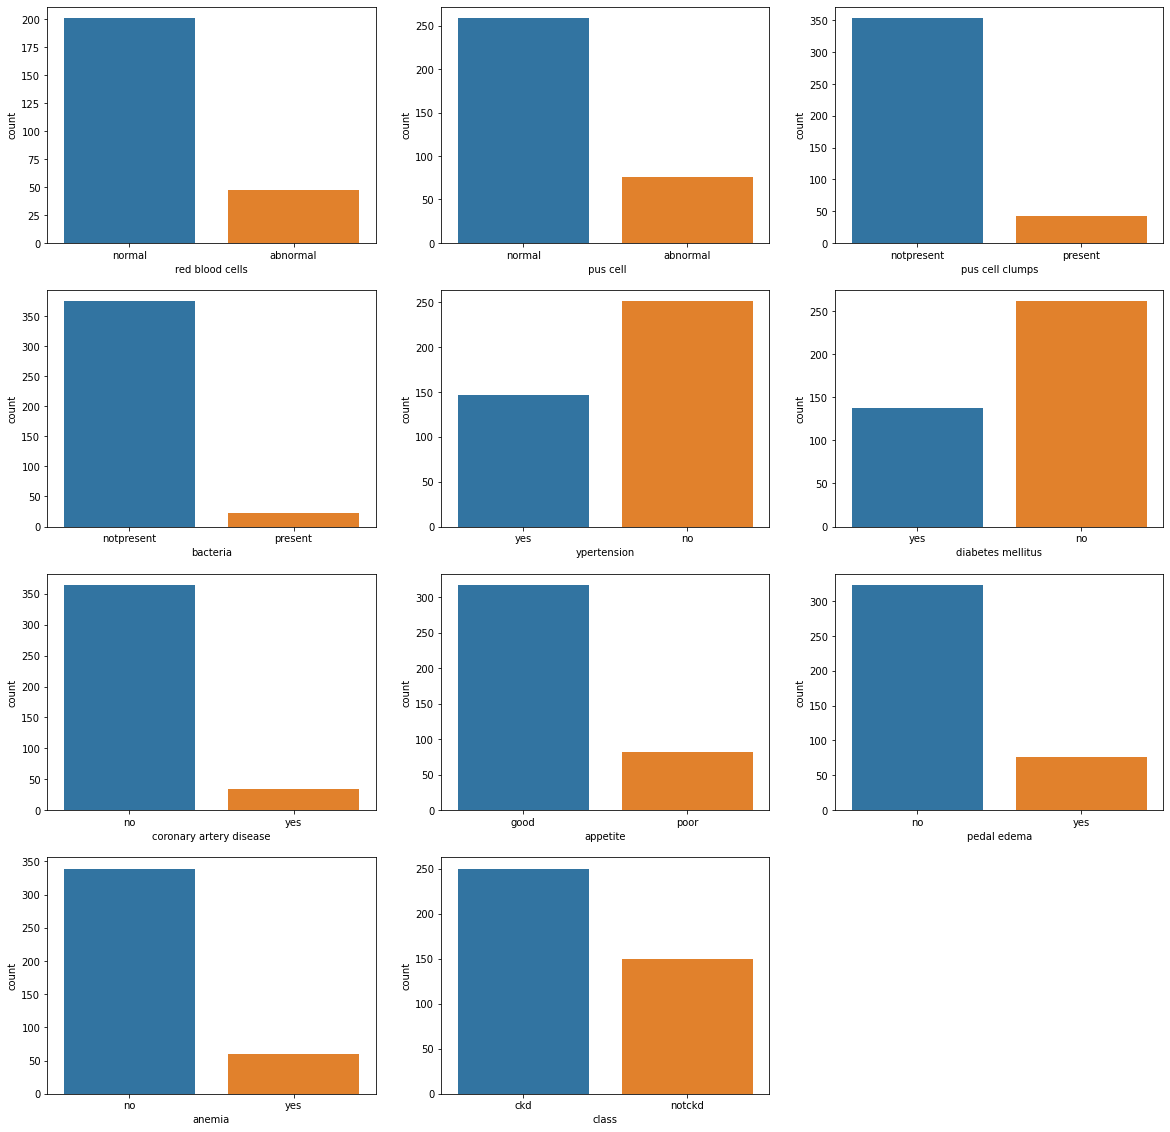

In [28]:
plt.figure(figsize=(20,20))

for i, feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(df[feature])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


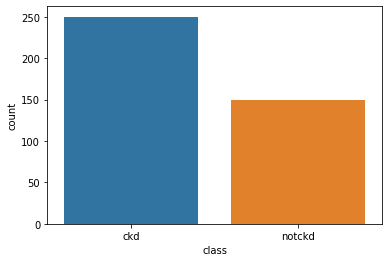

In [29]:
sns.countplot(df['class'])

# Check how columns are co-related with each other and its impact on Target feature

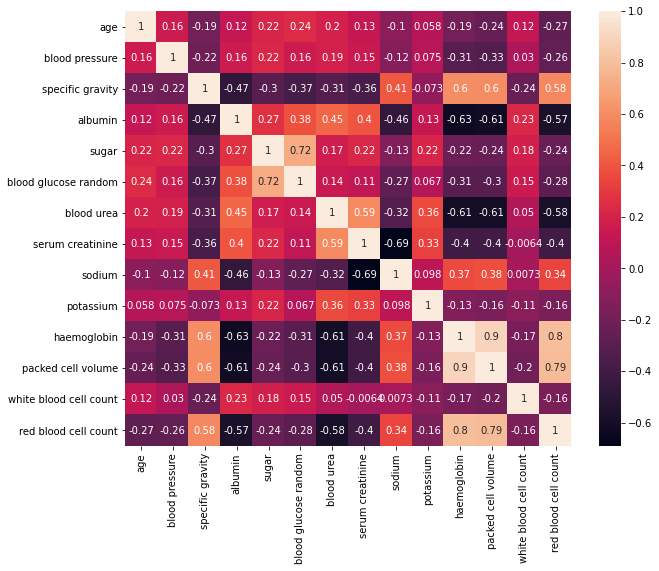

In [30]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [31]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [32]:
import plotly.express as px

In [33]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [34]:
px.violin(df, y='red blood cell count', x='class', color='class')

# Find relationship between haemoglobin & packed cell volume

In [35]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [36]:
px.scatter(df, x='haemoglobin', y='packed cell volume')

# Analysing ditribution of 'red_blood_cell_count' chronic as well as non-chronic

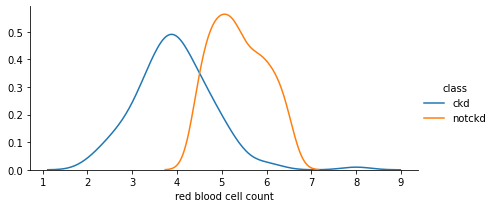

In [39]:
grid = sns.FacetGrid(df,hue='class', aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

# Automote analisis

In [40]:
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class',box=True)
  return fig.show()

In [41]:
def scatters(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color='class')
  return fig.show()

In [42]:
def kde_plot(feature):
  grid = sns.FacetGrid(df,hue='class', aspect=2)
  grid.map(sns.kdeplot, feature)
  grid.add_legend()

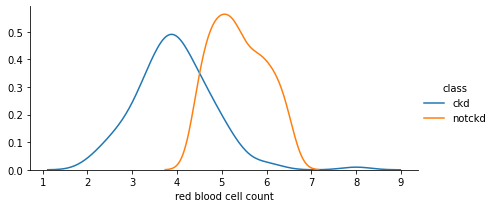

In [43]:
kde_plot('red blood cell count')

# Perform EDA on data

In [44]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

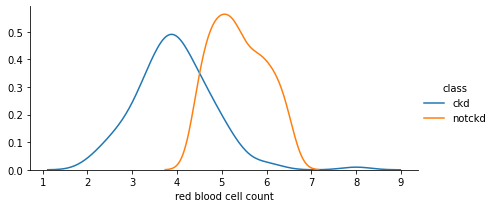

In [45]:
kde_plot('red blood cell count')

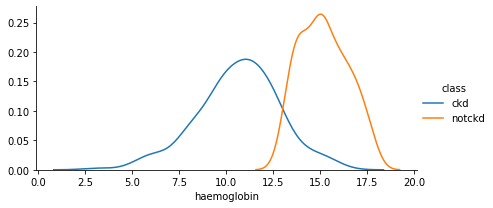

In [46]:
kde_plot('haemoglobin')

In [47]:
scatters('red blood cell count','packed cell volume')

In [48]:
scatters('red blood cell count','haemoglobin')

In [49]:
scatters('packed cell volume','haemoglobin')

In [50]:
violin('red blood cell count')

In [51]:
violin('packed cell volume')

In [52]:
scatters('red blood cell count','albumin')

# Perform data cleaning & deal with Missing values

In [54]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [55]:
## 10000, 8000
## normal dist....

In [56]:
## fill mv with mean, median, std dev

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



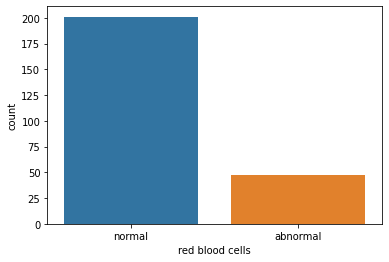

In [58]:
sns.countplot(df["red blood cells"])

In [59]:
data=df.copy()

In [60]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [62]:
data['red blood cells'].dropna().sample()

234    abnormal
Name: red blood cells, dtype: object

In [63]:
data['red blood cells'].isnull().sum()

152

In [67]:
random_sample=data['red blood cells'].dropna().sample(152)
random_sample

288      normal
269      normal
279      normal
341      normal
263      normal
         ...   
376      normal
316      normal
296      normal
303      normal
180    abnormal
Name: red blood cells, Length: 152, dtype: object

In [70]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [69]:
random_sample.index

Int64Index([288, 269, 279, 341, 263, 368, 365, 226, 338, 389,
            ...
             39,  92, 372, 313, 276, 376, 316, 296, 303, 180],
           dtype='int64', length=152)

In [71]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [72]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [73]:
random_sample

0        normal
1        normal
5        normal
6        normal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381    abnormal
Name: red blood cells, Length: 152, dtype: object

In [74]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [75]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [76]:
data['red blood cells'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



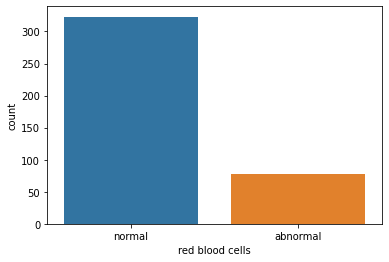

In [77]:
sns.countplot(data['red blood cells'])

In [78]:
def random_value_imputation(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(),feature]=random_sample

# Check missing values in categorical features & numerical features & fix it

In [79]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [80]:
for col in num_col:
  random_value_imputation(col)

In [81]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [82]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [83]:
random_value_imputation(' pus cell')

In [84]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [85]:
def impute_mode(feature):
  mode=data[feature].mode()[0]
  data[feature]=data[feature].fillna(mode)

In [86]:
for col in cat_col:
  impute_mode(col)

In [87]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [88]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,125.0,18.0,0.8,146.0,4.8,11.3,38.0,6000.0,5.5,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,131.0,2.5,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,133.0,5.0,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Apply feature encoding Technique on data 

In [90]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [ ]:
## Label encoding

## normal..0
## abnormal..1

In [ ]:
## use-case--100



In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le=LabelEncoder()

In [93]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [94]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,125.0,18.0,0.8,146.0,4.8,11.3,38.0,6000.0,5.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,131.0,2.5,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,5.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Select best features of your model using suitble Feature Importing Techniques

In [95]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [96]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [97]:
X=data[ind_col]
y=data[dep_col]

In [98]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,125.0,18.0,0.8,146.0,4.8,11.3,38.0,6000.0,5.5,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,131.0,2.5,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,5.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [99]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [100]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [101]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7feda9cf6440>)

In [102]:
ordered_feature.scores_

array([1.15174010e+02, 7.79603227e+01, 5.65401233e-03, 2.32167320e+02,
       9.56194286e+01, 1.02639835e+01, 1.59608889e+01, 2.52000000e+01,
       1.32000000e+01, 2.56678974e+03, 2.49728683e+03, 3.55878856e+02,
       3.02620056e+01, 5.27418577e+00, 1.27207910e+02, 3.42814111e+02,
       2.03088915e+04, 2.11777069e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [103]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=['score'])

In [104]:
datascores

,score
0,115.174010
1,77.960323
2,0.005654
3,232.167320
4,95.619429
5,10.263983
6,15.960889
7,25.200000
8,13.200000
9,2566.789742


In [105]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [106]:
features_rank=pd.concat([dfcols,datascores],axis=1)
features_rank

,0,score
0,age,115.174010
1,blood pressure,77.960323
2,specific gravity,0.005654
3,albumin,232.167320
4,sugar,95.619429
5,red blood cells,10.263983
6,pus cell,15.960889
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2566.789742


In [111]:
features_rank.columns=['features','Score']
features_rank

,features,Score
0,age,115.174010
1,blood pressure,77.960323
2,specific gravity,0.005654
3,albumin,232.167320
4,sugar,95.619429
5,red blood cells,10.263983
6,pus cell,15.960889
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2566.789742


In [112]:
features_rank.nlargest(10,'Score')

,features,Score
16,white blood cell count,20308.891504
9,blood glucose random,2566.789742
10,blood urea,2497.286827
11,serum creatinine,355.878856
15,packed cell volume,342.814111
3,albumin,232.167320
14,haemoglobin,127.207910
0,age,115.174010
4,sugar,95.619429
18,ypertension,88.200000


In [113]:
selected_columns=features_rank.nlargest(10,'Score')['features'].values
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [114]:
X_new=data[selected_columns]

In [115]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,125.0,18.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [116]:
len(X_new)

400

In [117]:
X_new.shape

(400, 10)

# Build a Cross-validation Model& predict & check accuracy model

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state=0,test_size=0.25)

In [121]:
print(X_train.shape)

(300, 10)


In [122]:
print(X_test.shape)

(100, 10)


In [123]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [125]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

In [126]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
    
}

In [127]:
from sklearn.model_selection import  RandomizedSearchCV

In [129]:
classifier=XGBClassifier()

In [130]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

In [131]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.996, total=   0.2s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=1.000, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.999, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.972, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, score=0.989, total=   0.0s
[CV] min_child_weight=3, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.992, total=   0.0s
[CV] min_child_weight=3, max_depth

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.992, total=   0.0s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=1.000, total=   0.0s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.998, total=   0.0s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.963, total=   0.0s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, score=0.986, total=   0.0s
[CV] min_child_weight=7, max_dep

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [132]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [133]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 3}

In [136]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [137]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
y_pred=classifier.predict(X_test)

In [140]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [142]:
confusion_matrix(y_test,y_pred)

array([[59,  3],
       [ 0, 38]])

In [143]:
accuracy_score(y_test,y_pred)

0.97